<div style="background-color:#e68867; padding:10px; border:2px solid black;">
    <h1><b>Quality | Ethics | Transparency</b></h1>
</div>

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
<h2>📌 [The World Happiness & Economics Trends 2016 Retrospective]</h2>
    
🔹 **Author** : MagaliTrueAnalytics🔹 **Date** : 2025-04-16 
🔹 **Sources** : [Link Dataset](https://raw.githubusercontent.com/MagaliTrueAnalytics/Portfolio/main/Projet1/Data/Happiness_2016.csv)  
🔹 **Objective** : This initiative offers a data-driven perspective on the key factors shaping global well-being and quality of life. Through interactive visualizations and a dynamic dashboard built with **Plotly**, we analyze pivotal indicators—GDP per capita, healthy life expectancy, family, freedom, trust in government, and generosity—to unveil their influence on happiness worldwide.

Powered by **Generative AI**, this project has been enriched at every stage, from data analysis to visualization and final narrative, ensuring a **dynamic and insightful exploration** of global trends in happiness and economics.
</div>

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>📈 Dataset Overview</h2>
    
**The World Happiness Report** is a global survey analyzing the state of happiness worldwide. It explores how economic, social, and governance factors shape both personal and national well-being. This dataset, available under the **CC0: Public Domain license on Kaggle**, provides insights into happiness metrics across different countries.

For this project, we focus on the **2016** dataset, which has been slightly modified for guided analysis.
</div>

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>🔎Méthodology</h2>
</div>

✅**Import libraries**

In [1]:
%pip install pandas

In [16]:
%pip install seaborn

In [3]:
%pip install matplotlib

In [37]:
!pip install plotly

<class 'OSError'>: Not available

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


✅**Load dataset**

In [2]:
import requests

url = "https://raw.githubusercontent.com/MagaliTrueAnalytics/Portfolio/main/Projet1/Data/Happiness_2016.csv"

# Download file
response = requests.get(url)
if response.status_code == 200:
    with open("Happiness_2016.csv", "wb") as file:
        file.write(response.content)

    # Load into a df
    df = pd.read_csv("Happiness_2016.csv")
    print(df.head())
else:
    print("Error: Unable to access the file.")

       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval Upper Confidence Interval  \
0                      7.460                     7.592   
1                      7.428                      7.59   
2                      7.333                     7.669   
3                      7.421                     7.575   
4                      7.351                     7.475   

  Economy (GDP per Capita)   Family Health (Life Expectancy)  Freedom  \
0                  1.44178  1.16374                  0.79504  0.57941   
1                  1.52733  1.14524                  0.86303  0.58557   
2                  1.42666  1

In [14]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.59,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [15]:
df.shape

(157, 13)

✅**Data Quality Inspection & Data Wrangling**

>Data type and missing values

In [4]:
# Step 1: Print the data types of each column
print("\nData types of columns:")
print(df.dtypes)

# Step 2: Check for unsuitable column data types
# Flag for identifying problematic columns
problematic_columns = []

for col, dtype in df.dtypes.items():
    if dtype == 'object':  # String/Text column
        if df[col].isnull().sum() > 0:
            problematic_columns.append((col, "Contains null values"))
    elif dtype in ['int64', 'float64']:  # Numeric columns
        if df[col].isnull().sum() > 0:
            problematic_columns.append((col, "Contains null values"))
        non_numeric_found = df[col].apply(lambda x: isinstance(x, (int, float))) != df[col].apply(lambda x: True)
        if non_numeric_found.any():
            problematic_columns.append((col, "Contains non-numeric values"))
    else:
        problematic_columns.append((col, f"Unsupported type: {dtype}"))

# Print any problematic columns
if problematic_columns:
    print("\nProblems identified in column types:")
    for col, issue in problematic_columns:
        print(f"- {col}: {issue}")


Data types of columns:
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval         object
Economy (GDP per Capita)          object
Family                           float64
Health (Life Expectancy)          object
Freedom                           object
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Problems identified in column types:
- Lower Confidence Interval: Contains null values
- Upper Confidence Interval: Contains null values
- Economy (GDP per Capita): Contains null values
- Health (Life Expectancy): Contains null values


In [6]:
print(df.dtypes)

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval         object
Economy (GDP per Capita)          object
Family                           float64
Health (Life Expectancy)          object
Freedom                           object
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


In [7]:
# Convert object-type columns to float, coercing errors into NaN
df['Upper Confidence Interval'] = pd.to_numeric(df['Upper Confidence Interval'], errors='coerce')
df['Economy (GDP per Capita)'] = pd.to_numeric(df['Economy (GDP per Capita)'], errors='coerce')
df['Health (Life Expectancy)'] = pd.to_numeric(df['Health (Life Expectancy)'], errors='coerce')
df['Freedom'] = pd.to_numeric(df['Freedom'], errors='coerce')
# Display DataFrame with updated types
print(df.dtypes)

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


>Data Cleaning - Checking for missing values

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        4
Upper Confidence Interval        3
Economy (GDP per Capita)         2
Family                           0
Health (Life Expectancy)         3
Freedom                          1
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
# List of columns with NaN
columns_to_fill = ['Lower Confidence Interval','Upper Confidence Interval',
                   'Economy (GDP per Capita)','Health (Life Expectancy)','Freedom']

# Replace NaN by mean
df[columns_to_fill] = df[columns_to_fill].apply(lambda col: col.fillna(col.mean()))
print(df.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>🎨Exploratory Data Analysis and Statistics</h2>   
</div>

✅**Overview of dataset**

In [16]:
# Group by 'Region' and count occurrences of 'Country'
region_counts = df.groupby('Region')['Country'].nunique().reset_index()

# Renommer la colonne pour plus de clarté
region_counts.columns = ['Region', 'Number of Countries']

print(region_counts)

                            Region  Number of Countries
0        Australia and New Zealand                    2
1       Central and Eastern Europe                   29
2                     Eastern Asia                    6
3      Latin America and Caribbean                   24
4  Middle East and Northern Africa                   19
5                    North America                    2
6                Southeastern Asia                    9
7                    Southern Asia                    7
8               Sub-Saharan Africa                   38
9                   Western Europe                   21


In [11]:
# Calculate average of 'Economy (GDP per Capita)' by Region
gdp_avg_by_region = df.groupby('Region')['Economy (GDP per Capita)'].mean().reset_index()

# Renommer la colonne pour plus de clarté
gdp_avg_by_region.columns = ['Region', 'Avg GDP per Capita']

print(gdp_avg_by_region)

                            Region  Avg GDP per Capita
0        Australia and New Zealand            1.402545
1       Central and Eastern Europe            1.047537
2                     Eastern Asia            1.277312
3      Latin America and Caribbean            0.999975
4  Middle East and Northern Africa            1.113614
5                    North America            1.474055
6                Southeastern Asia            0.896381
7                    Southern Asia            0.660671
8               Sub-Saharan Africa            0.474321
9                   Western Europe            1.417056


In [12]:
# Calculate mean of 'Health (Life Expectancy)' by Region
health_avg_by_region = df.groupby('Region')['Health (Life Expectancy)'].mean().reset_index()

# Rename columns
health_avg_by_region.columns = ['Region', 'Avg Health (Life Expectancy)']

print(health_avg_by_region)

                            Region  Avg Health (Life Expectancy)
0        Australia and New Zealand                      0.841080
1       Central and Eastern Europe                      0.626408
2                     Eastern Asia                      0.806680
3      Latin America and Caribbean                      0.612703
4  Middle East and Northern Africa                      0.616438
5                    North America                      0.690471
6                Southeastern Asia                      0.561369
7                    Southern Asia                      0.453670
8               Sub-Saharan Africa                      0.239872
9                   Western Europe                      0.811684


In [13]:
# Calculate the mean of 'Happiness Score' by Region
happiness_avg_by_region = df.groupby('Region')['Happiness Score'].mean().reset_index()

# Rename column
happiness_avg_by_region.columns = ['Region', 'Avg Happiness Score']

print(happiness_avg_by_region)

                            Region  Avg Happiness Score
0        Australia and New Zealand             7.323500
1       Central and Eastern Europe             5.370690
2                     Eastern Asia             5.624167
3      Latin America and Caribbean             6.101750
4  Middle East and Northern Africa             5.386053
5                    North America             7.254000
6                Southeastern Asia             5.338889
7                    Southern Asia             4.563286
8               Sub-Saharan Africa             4.136421
9                   Western Europe             6.685667


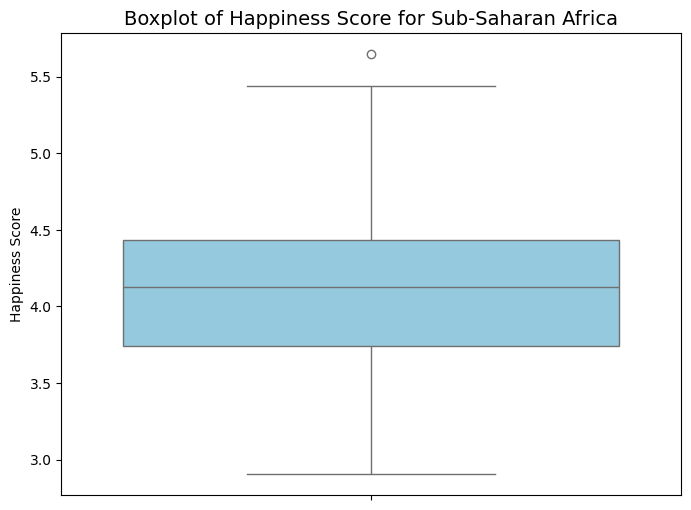

In [18]:

# Filter data for Sub-Saharan Africa
df_africa = df[df['Region'] == 'Sub-Saharan Africa']

# Bboxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_africa['Happiness Score'], color='skyblue')

# Add title and labels
plt.title("Boxplot of Happiness Score for Sub-Saharan Africa", fontsize=14)
plt.ylabel("Happiness Score")

plt.show()

In [19]:
# Filter data for Sub-Saharan Africa
df_africa = df[df['Region'] == 'Sub-Saharan Africa']

# Identify country with the highest Happiness Score
highest_happiness = df_africa.loc[df_africa['Happiness Score'].idxmax(), ['Country', 'Happiness Score']]

# Identify country with the lowest Happiness Score
lowest_happiness = df_africa.loc[df_africa['Happiness Score'].idxmin(), ['Country', 'Happiness Score']]

print("Country with the highest Happiness Score :", highest_happiness)
print("Country with the lowest Happiness Score :", lowest_happiness)

Country with the highest Happiness Score : Country            Mauritius
Happiness Score        5.648
Name: 65, dtype: object
Country with the lowest Happiness Score : Country            Burundi
Happiness Score      2.905
Name: 156, dtype: object


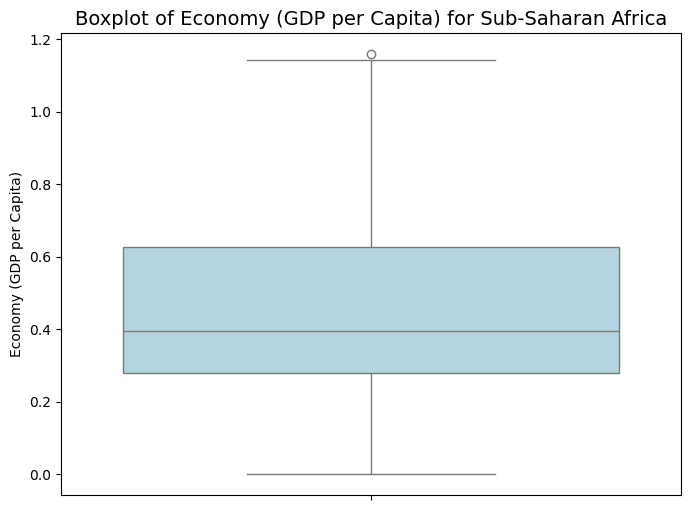

In [20]:
# Filter on Sub-Saharan Africa
df_africa = df[df['Region'] == 'Sub-Saharan Africa']

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_africa['Economy (GDP per Capita)'], color='lightblue')

# Add title labels
plt.title("Boxplot of Economy (GDP per Capita) for Sub-Saharan Africa", fontsize=14)
plt.ylabel("Economy (GDP per Capita)")

plt.show()

In [21]:
# Filter data for Sub-Saharan Africa
df_africa = df[df['Region'] == 'Sub-Saharan Africa']

# Identify country with the highest Economy (GDP per Capita)
highest_GDP = df_africa.loc[df_africa['Economy (GDP per Capita)'].idxmax(), ['Country', 'Economy (GDP per Capita)']]

# Identify country with the lowest Economy (GDP per Capita)
lowest_GDP = df_africa.loc[df_africa['Economy (GDP per Capita)'].idxmin(), ['Country', 'Economy (GDP per Capita)']]

print("Country with the highest Economy (GDP per Capita) :", highest_GDP)
print("Country with the lowest Economy (GDP per Capita) :", lowest_GDP)

Country with the highest Economy (GDP per Capita) : Country                       Gabon
Economy (GDP per Capita)    1.15851
Name: 133, dtype: object
Country with the lowest Economy (GDP per Capita) : Country                     Somalia
Economy (GDP per Capita)        0.0
Name: 75, dtype: object


In [32]:
# Sect top 10 countries Happiness Rank
top_10_happiness = df.nsmallest(10, 'Happiness Rank')[['Country', 'Happiness Rank']]

print("Top 10 country for Happiness Rank :")
print(top_10_happiness)

Top 10 country for Happiness Rank :
       Country  Happiness Rank
0      Denmark               1
1  Switzerland               2
2      Iceland               3
3       Norway               4
4      Finland               5
5       Canada               6
6  Netherlands               7
7  New Zealand               8
8    Australia               9
9       Sweden              10


<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>🎨Visualizations</h2>   
</div>

>Top 10 Happiest countries in the World

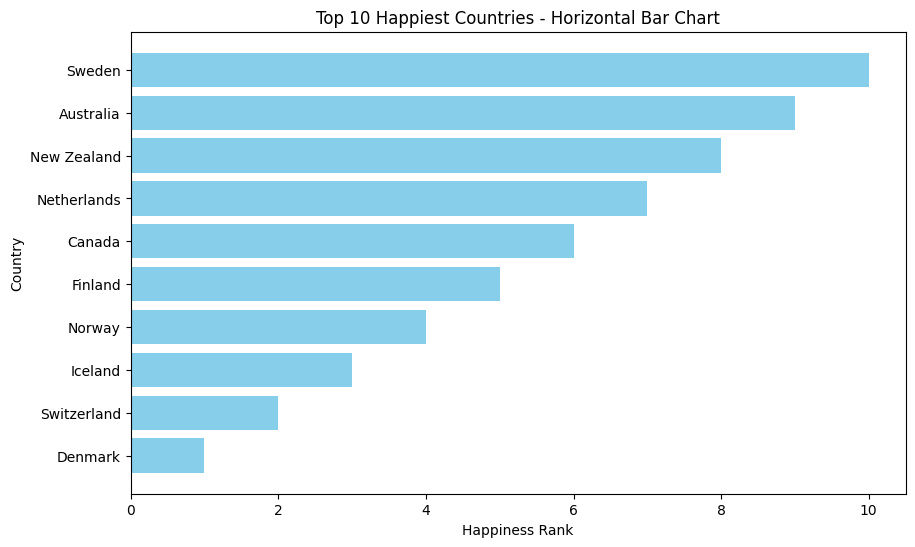

In [33]:
# Select top 10 countries for Happiness Rank
top_10_happiness = df.nsmallest(10, 'Happiness Rank')[['Country', 'Happiness Rank']]

# Sort by Happiness Rank descending
top_10_happiness = top_10_happiness.sort_values(by='Happiness Rank', ascending=False)

# Bar chart horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_10_happiness['Country'], top_10_happiness['Happiness Rank'], color='skyblue')

# Ajouter titres et labels
plt.xlabel('Happiness Rank')
plt.ylabel('Country')
plt.title('Top 10 Happiest Countries - Horizontal Bar Chart')

# Invert axis
plt.gca().invert_yaxis()
plt.show()

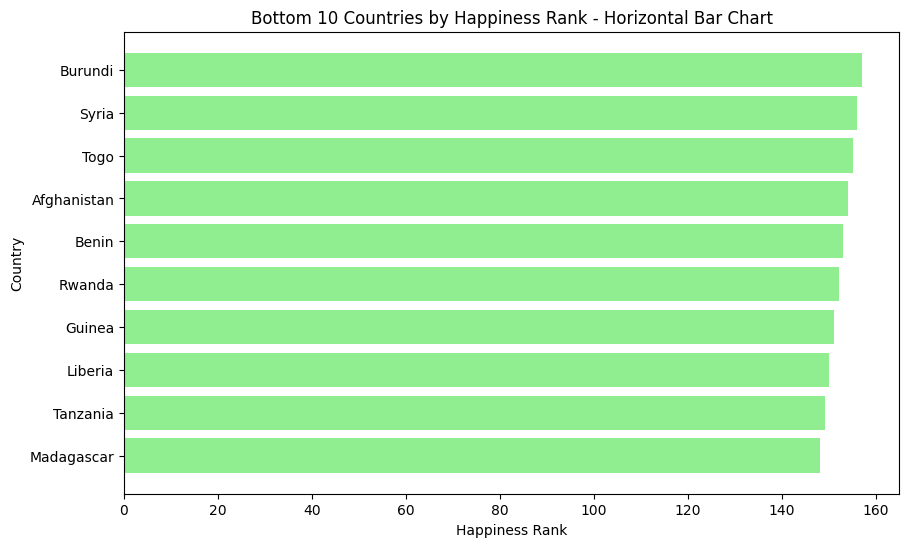

In [34]:
# Select 10 countries with the last Happiness Rank
bottom_10_happiness = df.nlargest(10, 'Happiness Rank')[['Country', 'Happiness Rank']]

# Sort by Happiness Rank
bottom_10_happiness = bottom_10_happiness.sort_values(by='Happiness Rank', ascending=True)

# Bar chart horizontal
plt.figure(figsize=(10, 6))
plt.barh(bottom_10_happiness['Country'], bottom_10_happiness['Happiness Rank'], color='lightgreen')

# Add title and labels
plt.xlabel('Happiness Rank')
plt.ylabel('Country')
plt.title('Bottom 10 Countries by Happiness Rank - Horizontal Bar Chart')

plt.show()

In [29]:
df['Health (Life Expectancy)'].describe()

count    157.000000
mean       0.553342
std        0.227131
min        0.000000
25%        0.382910
50%        0.594710
75%        0.717230
max        0.952770
Name: Health (Life Expectancy), dtype: float64

>Bubble plot Happiness vs GDP vs Health Life Expectancy

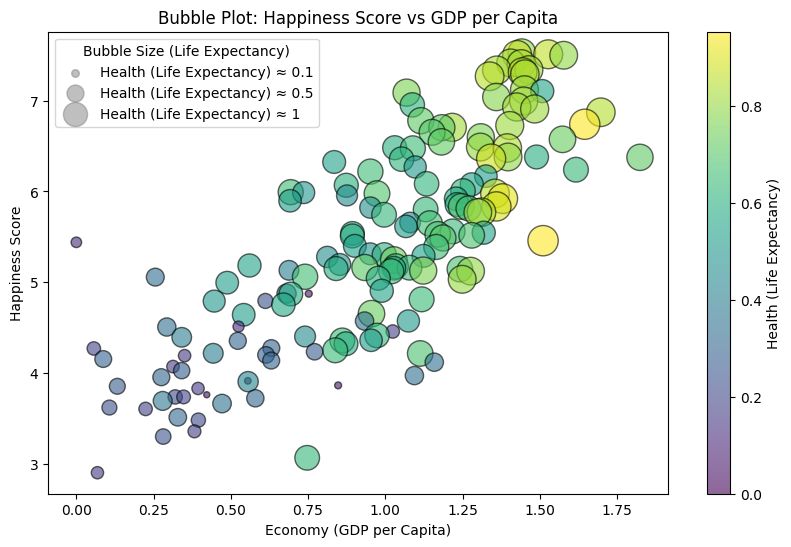

In [31]:
# Bubble plot
plt.figure(figsize=(10, 6))

# Scatter plot with color and size 'Health (Life Expectancy)'
scatter = plt.scatter(df['Economy (GDP per Capita)'], df['Happiness Score'], 
                      s=df['Health (Life Expectancy)'] * 500,  
                      c=df['Health (Life Expectancy)'], cmap='viridis', alpha=0.6, edgecolors='k')

# Add legend for bubble size
for size in [0.1, 0.5, 1]:  
    plt.scatter([], [], s=size*300, c='gray', alpha=0.5, label=f'Health (Life Expectancy) ≈ {size}')

plt.legend(title="Bubble Size (Life Expectancy)", loc='upper left')

# Add colorbar for 'Health (Life Expectancy)'
plt.colorbar(scatter, label='Health (Life Expectancy)')

# Add title and labels
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.title('Bubble Plot: Happiness Score vs GDP per Capita')

plt.show()

✅**Data Insights and Visualizations → Trends & correlations**

>Identify the GDP per capita and Healthy Life Expectancy of the top 10 countries.

In [36]:
import pandas as pd
import plotly.graph_objects as go

# Select top 10 countries based on Healthy Life Expectancy
df_top10 = df.nlargest(10, 'Health (Life Expectancy)')

# Create bar chart using Plotly
fig1 = go.Figure()

fig1.add_trace(go.Bar(
    x=df_top10['Country'],
    y=df_top10['Economy (GDP per Capita)'],
    name='GDP per Capita',
    marker_color='lightblue'
))

fig1.add_trace(go.Bar(
    x=df_top10['Country'],
    y=df_top10['Health (Life Expectancy)'],
    name='Health (Life Expectancy)',
    marker_color='lightgreen'
))

# Update layout
fig1.update_layout(
    title="GDP per Capita & Healthy Life Expectancy of Top 10 Countries",
    xaxis_title="Country",
    yaxis_title="Value",
    barmode='group'
)

# Show the figure
fig1.show()

<class 'ModuleNotFoundError'>: No module named 'plotly'

>Correlation (heatmap) between the Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity and Happiness score. 

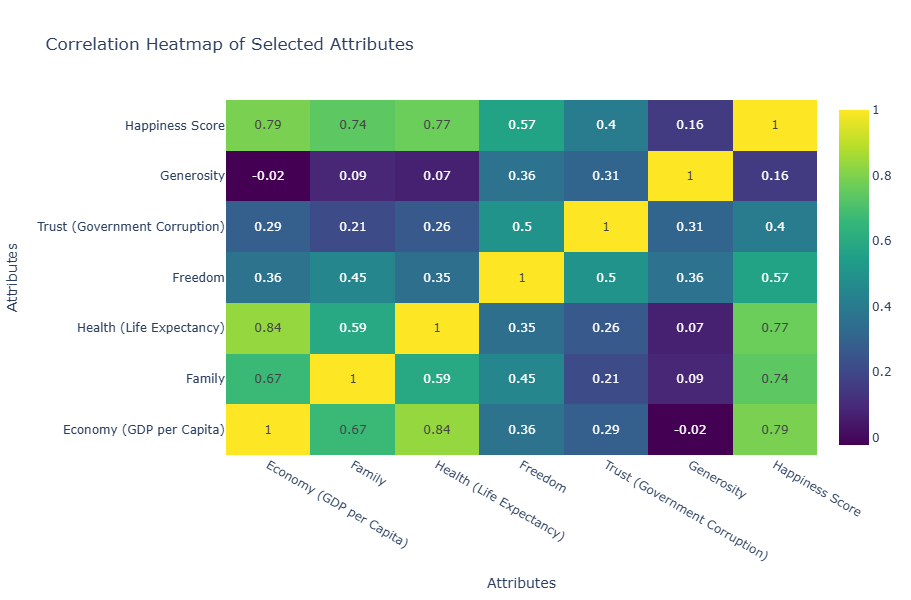

In [61]:
import pandas as pd
import plotly.graph_objects as go

# Step 1: Create a sub-dataset with selected attributes
selected_columns = [
    'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
    'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Happiness Score'
]

df_subset = df[selected_columns]

# Step 2: Compute correlation matrix
correlation_matrix = df_subset.corr()

# Step 3: Create a heatmap using Plotly
fig2 = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='Viridis',
    text=correlation_matrix.round(2).values,  # Display correlation values
    texttemplate="%{text}",  # Format text inside heatmap cells
))

# Update layout
fig2.update_layout(
    title="Correlation Heatmap of Selected Attributes",
    xaxis_title="Attributes",
    yaxis_title="Attributes",
    width=800,
    height=600
)

# Show the figure
fig2.show()


>Create a scatter plot to identify the effect of GDP per Capita on Happiness Score in various Regions. 

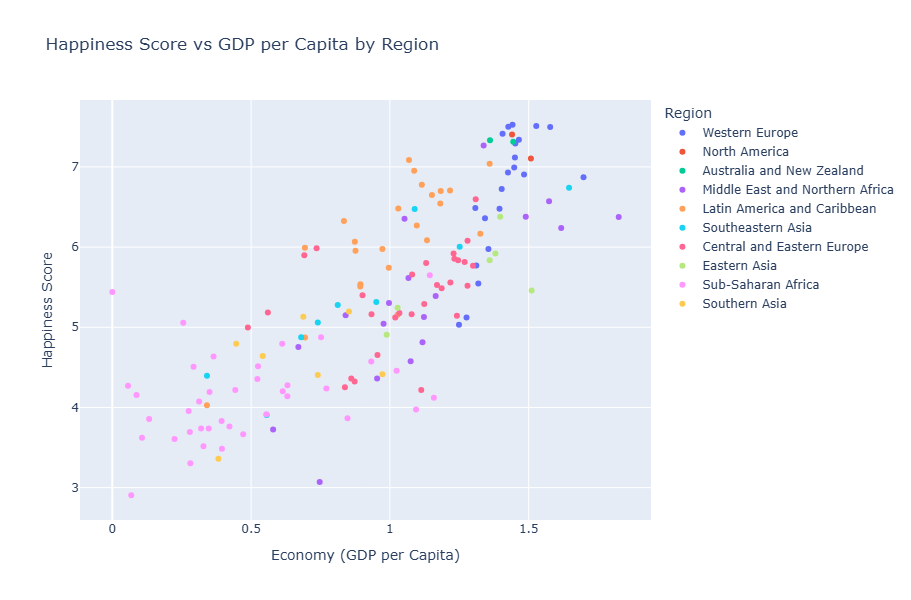

In [62]:
import pandas as pd
import plotly.express as px

# Create scatter plot using Plotly
fig3 = px.scatter(
    df,
    x='Economy (GDP per Capita)',
    y='Happiness Score',
    color='Region',
    hover_data=['Country'],
    title="Happiness Score vs GDP per Capita by Region",
    labels={'GDP per Capita': 'GDP per Capita ($)', 'Happiness Score': 'Happiness Score'},
    width=800,
    height=600
)

# Show the figure
fig3.show()

>Create a pie chart to present Happiness Score by Regions

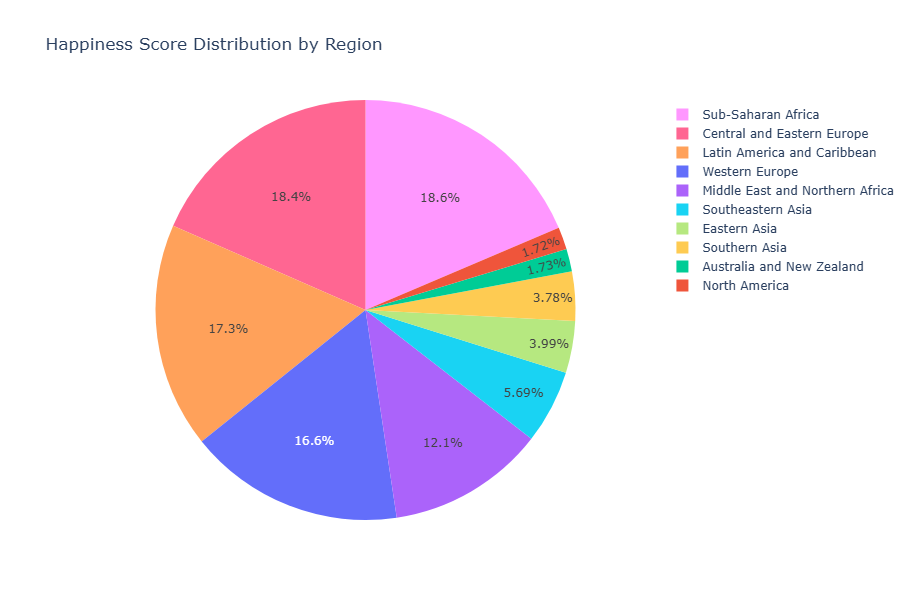

In [63]:
import pandas as pd
import plotly.express as px

# Create pie chart using Plotly
fig4 = px.pie(
    df,
    values='Happiness Score',
    names='Region',
    title="Happiness Score Distribution by Region",
    color='Region',
    width=800,
    height=600
)

# Show the figure
fig4.show()

>Create a map to display GDP per capita of countries and include Healthy life expectancy to be shown as a tooltip

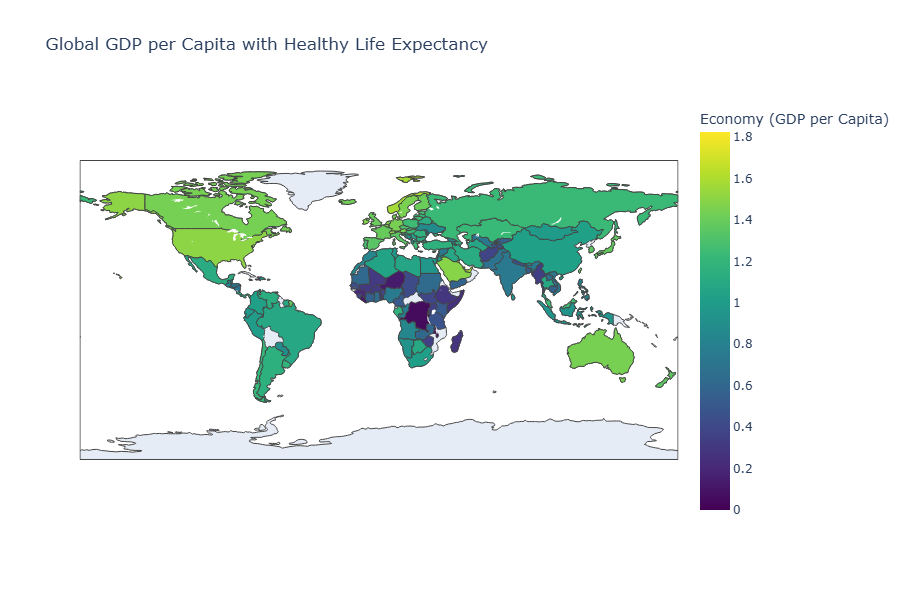

In [64]:
import pandas as pd
import plotly.express as px

# Create choropleth map using Plotly
fig5 = px.choropleth(
    df,
    locations='Country',  
    locationmode='country names',
    color='Economy (GDP per Capita)',
    hover_name='Country',
    hover_data={'Health (Life Expectancy)': True, 'Economy (GDP per Capita)': True},
    color_continuous_scale='Viridis',
    title="Global GDP per Capita with Healthy Life Expectancy",
    width=900,
    height=600
)

# Show the figure
fig5.show()

>Dashboarding and Storytelling

In [35]:
import plotly.io as pio

# List of figures to include in the dashboard
figures = [fig1, fig2, fig3, fig4, fig5]  

# Create an HTML structure to combine multiple figures
html_content = "<html><head><title>Dashboard</title></head><body>"

for fig in figures:
    html_content += pio.to_html(fig, full_html=False, include_plotlyjs='cdn')

html_content += "</body></html>"

# Write to an HTML file
with open("dashboard.html", "w", encoding="utf-8") as f:
    f.write(html_content)

print("Dashboard saved as dashboard.html")

<class 'ModuleNotFoundError'>: No module named 'plotly'

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>🎭Storytelling</h2>   
</div>

>Generate the narrative to present the dashboard

**Prompt** : "Generate a narrative to present the dashboard on world happiness report with the following charts:
    0. The bar chart Identifying the GDP per capita and Healthy Life Expectancy of the top 10 countries : hong kong (1st place in Health life exp, 3d in GDP), Singapour (1st in GDP, 2nd in Health life exp), japan, south korea, spain, iceland, switzerland, australia, italy and finally Israel (10st position)
    1. A heatmap showing correlation : health life exp vs economy GDP (0.84), happiness vs GDP (0.79), hapiness vs Family (0.74) and happiness vs Health life exp (0.77)
    2. A scatter plot to identify the effect of GDP per Capita on Happiness Score in various Regions (western Europe & north america :highest GDP and highest Health Life exp, LAtin america and caribbean: in the middle, sub-saharian africa the lowest GDP and Health life exp)
    3. A pie chart to present Happiness score by Regions (top 5 happiness score: sub-saharian africa(18.6%), entral and esatern europe (18.4%),latin america and caribbean (17.3%), western europe (16.6%), middle east and northern africa (12.1%)
    4. A map to display `GDP per capita` of `countries` and include `Healthy Life Expectancy` to be shown as a tooltip"

<div style="padding:10px;border:2px solid black;">
    
### **World Happiness Report Dashboard Narrative**

The **World Happiness Report Dashboard** provides a data-driven perspective on the factors influencing global well-being and quality of life. Through interactive visualizations, we explore key indicators such as **GDP per Capita, Healthy Life Expectancy, Family, Freedom, Trust in Government, and Generosity**, uncovering their impact on happiness worldwide.

#### **1. Economic Strength & Healthy Life Expectancy: Bar Chart**
The first visualization presents the **top 10 countries ranked by Healthy Life Expectancy**, highlighting their GDP per Capita. 
- **Hong Kong** leads in Healthy Life Expectancy, securing the **first position**, while placing **third in GDP per Capita**.
- **Singapore** takes the **top spot in GDP per Capita** and **second place in Healthy Life Expectancy**.
- The list continues with **Japan, South Korea, Spain, Iceland, Switzerland, Australia, Italy,** and **Israel**, demonstrating strong economic prosperity coupled with high life expectancy.
This analysis underscores the relationship between financial stability and public health, showing how countries with higher GDP tend to provide better healthcare, leading to longer lifespans.

#### **2. Correlation Among Key Happiness Indicators: Heatmap**
A detailed **heatmap** unveils the **strong correlations** between different factors affecting happiness:
- **Health Life Expectancy vs Economy (GDP)** (0.84) – A high correlation indicating that economic prosperity contributes to better healthcare infrastructure.
- **Happiness vs GDP** (0.79) – Financial security plays a crucial role in overall life satisfaction.
- **Happiness vs Family Support** (0.74) – Strong family connections significantly enhance happiness.
- **Happiness vs Health Life Expectancy** (0.77) – Longer, healthier lives contribute to increased happiness.
These relationships provide compelling evidence of the fundamental elements shaping well-being.

#### **3. The Economic Impact on Happiness: Scatter Plot**
The scatter plot examines the **effect of GDP per Capita on Happiness Scores across various regions**:
- **Western Europe & North America** demonstrate **high GDP and high Healthy Life Expectancy**, showcasing their advanced healthcare systems and economic strength.
- **Latin America & The Caribbean** occupy a **middle ground**, reflecting moderate prosperity with varying levels of life satisfaction.
- **Sub-Saharan Africa** faces **the lowest GDP and Healthy Life Expectancy**, highlighting economic struggles and lower overall happiness.
This visualization underscores global inequalities and the role of wealth distribution in shaping happiness levels.

#### **4. Regional Distribution of Happiness: Pie Chart**
The **pie chart** presents the **Happiness Score distribution across regions**:
- **Sub-Saharan Africa (18.6%)** 
- **Central & Eastern Europe (18.4%)** 
- **Latin America & Caribbean (17.3%)** 
- **Western Europe (16.6%)** 
- **Middle East & North Africa (12.1%)** 
These insights highlight regional variations, emphasizing that cultural, economic, and social structures play a major role in shaping happiness.

#### **5. Global Economic & Health Overview: Map**
The interactive **world map** showcases **GDP per Capita** across countries, with **Healthy Life Expectancy displayed as a tooltip**. Users can explore individual countries, comparing economic well-being and public health outcomes across different regions.

### **Conclusion**
This **World Happiness Report Dashboard** provides a holistic view of **economic well-being, healthcare access, and happiness across the globe**. Through these visualizations, we gain a deeper understanding of the factors influencing happiness, supporting policy decisions and discussions on how to improve well-being worldwide.
</div>

<div style="background-color:#c7cbe9; padding:10px;border:2px solid black;">
    
<h2>🎭Results & Final Insights</h2>   
</div>

The outcomes of this project are presented through an interactive Plotly HTML dashboard and a comprehensive report edited via Canva.

📊 **Dashboard (Plotly)**: This dynamic visualization allows users to explore key indicators interactively, offering insights into the relationship between happiness and economic factors. Access it here: [Dashboard](https://github.com/MagaliTrueAnalytics/Portfolio/blob/main/Projet1/Report/The%20World%20Happiness%20Report%20Dashboard.html).

📄 **Final Report (Canva)**: A well-structured document summarizing the methodology, findings, and key takeaways. View the full report here: [Final Report](https://github.com/MagaliTrueAnalytics/Portfolio/blob/main/Projet1/Report/WorldHappiness2016_Report).

Both resources provide a data-driven narrative, enabling a deeper understanding of global well-being trends and their economic implications.